In [2]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [3]:
with open('/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/df_features_train.pickle', 'rb') as f:
    df_train = pickle.load(f)

df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,spectro_126,spectro_127,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,targets
bass_synthetic_118-102-075,1,-884.933960,-2.320375,-7.598537,6.669960,-5.757733,-4.570653,3.537684,8.229434,-8.154847,...,2.851789e-05,3.621068e-06,9.479299,8.787518,12.119563,13.133300,25.771786,15.772252,38.933736,0
bass_synthetic_091-037-100,0,-220.012695,109.073448,-42.029823,62.097511,-25.180239,24.453278,-6.118116,0.722401,1.046290,...,2.125629e-04,2.631775e-06,24.463468,22.673240,24.142719,24.608647,24.602065,24.604566,54.848149,0
bass_synthetic_049-050-127,1,-428.321442,78.932564,49.037472,19.451157,1.052137,-5.299679,-4.053771,-0.971190,0.050625,...,9.520607e-09,2.131584e-09,33.949063,16.940012,38.501161,36.002089,17.692788,20.552890,35.605601,0
bass_synthetic_024-039-075,0,-138.675507,111.494522,-36.538029,54.519581,-28.018496,33.449951,-21.018784,15.656427,-11.976345,...,1.107244e-02,4.178098e-05,28.111754,24.796154,25.164830,25.219987,24.655611,22.543501,58.148560,0
bass_synthetic_076-068-100,1,-376.694183,63.272846,26.981892,44.229336,-0.434627,10.206123,-12.221120,-1.409725,-9.253183,...,1.236483e-04,3.160769e-08,28.638974,28.643534,38.444684,42.543455,36.476545,30.924845,50.318333,0


In [4]:
df_train.shape

(35091, 150)

In [5]:
with open('/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,spectro_126,spectro_127,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,targets
string_acoustic_056-047-075,1,-507.219849,41.643745,19.530516,13.701504,10.135546,6.175853,2.912810,2.373481,0.585242,...,8.207117e-07,1.241046e-08,22.121006,19.448583,18.456434,17.684487,17.591990,16.360521,37.968071,8
flute_synthetic_000-053-025,0,-371.637268,94.362877,-16.497566,5.654224,24.280115,26.226492,20.402313,7.027387,9.045853,...,9.740931e-08,4.592398e-10,32.031359,23.644327,26.098699,22.241589,23.567177,23.099435,47.710176,2
organ_electronic_001-060-127,0,-393.385040,87.405540,35.586105,25.661533,15.142327,-7.776473,-12.265137,-7.048068,-4.952650,...,2.093243e-08,1.671509e-09,26.228082,33.240870,33.575216,33.282782,26.366399,27.471283,37.542970,6
keyboard_electronic_002-072-075,1,-519.744873,18.899090,-2.180397,-1.463076,-7.363991,-8.445083,-9.944641,-11.849157,-10.626397,...,2.522285e-07,1.987249e-09,20.535020,12.685425,36.865925,28.328093,21.645329,18.269941,37.289501,4
guitar_acoustic_021-096-100,1,-540.653564,3.791504,-1.226335,1.353811,1.360006,0.636633,-1.806472,-0.173970,1.186608,...,1.658210e-07,1.156663e-09,15.437801,15.504174,16.227503,15.905432,18.791925,16.983810,19.156708,3


In [6]:
df_test.shape

(30599, 150)

In [7]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

## Naive Bayes

Model Training ->

In [8]:
#instantiate the classifier
clf_NB = GaussianNB()

#fit to training data
clf_NB.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred_NB = clf_NB.predict(X_test)

In [10]:
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of the Naive Bayes classifier is {0:.2%}".format(accuracy_NB))

The accuracy of the Naive Bayes classifier is 12.59%


Let us plot this in a confusion matrix.

In [43]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [12]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.02281918 0.05921433 0.0556037  0.01617562 0.2281918  0.02902946
  0.03350664 0.04217215 0.48079145 0.         0.03249567]
 [0.01743796 0.18578135 0.01073105 0.00268276 0.03353454 0.01207243
  0.01408451 0.03822938 0.67203219 0.         0.01341382]
 [0.03518124 0.15991471 0.19722814 0.02878465 0.12899787 0.02558635
  0.06183369 0.12260128 0.23773987 0.         0.0021322 ]
 [0.00606236 0.0493649  0.01876443 0.01703233 0.14838337 0.03146651
  0.00981524 0.01068129 0.70236721 0.         0.00606236]
 [0.00348944 0.06042241 0.00661157 0.01010101 0.13149679 0.02075298
  0.00532599 0.00808081 0.74802571 0.         0.0056933 ]
 [0.00563063 0.05292793 0.00816441 0.01661036 0.13682432 0.03997748
  0.00563063 0.01745495 0.70439189 0.         0.01238739]
 [0.01402373 0.20091694 0.06957929 0.0293959  0.201726   0.04557713
  0.09546926 0.04773463 0.27858684 0.         0.01699029]
 [0.01329601 0.29111267 0.06438069 0.01539538 0.07207838 0.01119664
  0.02169349 0.1154653

<AxesSubplot:title={'center':'Normalized confusion matrix for Naive Bayes'}, xlabel='Predicted label', ylabel='True label'>

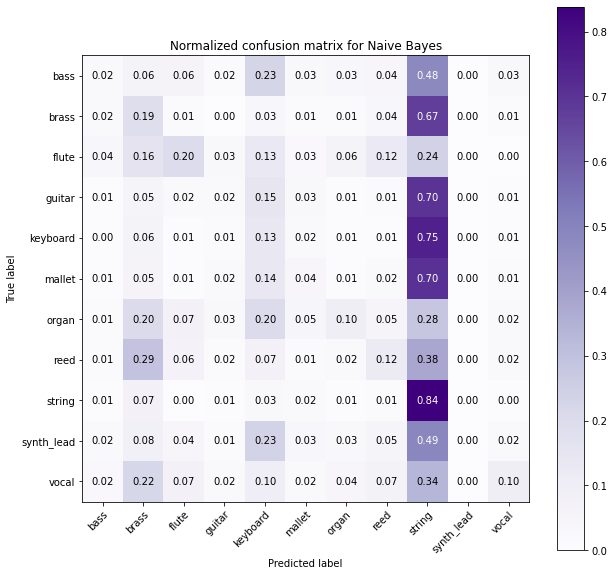

In [13]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
#plt.savefig('ConfusionMatrix/NB_normalized.png')

## Random Forests

In [14]:
# instantiate the random forest
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [15]:
# fitting the model
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [16]:
y_pred_RF = clf_Rf.predict(X_test)

In [17]:
# printing the accuracy ->

accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of the Random Forest classifier is {0:.2%}".format(accuracy_RF))

The accuracy of the Random Forest classifier is 73.35%


Let us plot the confusion matrix for it.

Normalized confusion matrix
[[6.76920855e-01 1.02541883e-02 1.54534951e-02 1.05574812e-01
  6.80242634e-02 5.63258232e-02 1.87752744e-02 1.63200462e-02
  5.63258232e-03 0.00000000e+00 2.67186597e-02]
 [2.68276325e-03 9.53051643e-01 7.37759893e-03 2.01207243e-03
  2.68276325e-03 2.68276325e-03 2.01207243e-03 1.00603622e-02
  1.27431254e-02 0.00000000e+00 4.69483568e-03]
 [9.59488273e-03 9.59488273e-03 9.24307036e-01 5.33049041e-03
  4.26439232e-03 1.06609808e-03 5.33049041e-03 3.41151386e-02
  3.19829424e-03 0.00000000e+00 3.19829424e-03]
 [1.14030023e-01 1.27020785e-02 6.92840647e-03 6.43187067e-01
  8.60277136e-02 9.38221709e-02 1.78983834e-02 7.21709007e-03
  1.12586605e-02 0.00000000e+00 6.92840647e-03]
 [7.38292011e-02 1.74471993e-02 1.19375574e-02 1.07070707e-01
  6.29568411e-01 9.47658402e-02 2.62626263e-02 1.61616162e-02
  9.55004591e-03 0.00000000e+00 1.34067952e-02]
 [6.10923423e-02 1.68918919e-02 1.32319820e-02 5.88400901e-02
  9.00900901e-02 7.24380631e-01 8.44594595e-03 5.6

<AxesSubplot:title={'center':'Normalized confusion matrix for the Random Forest classifier'}, xlabel='Predicted label', ylabel='True label'>

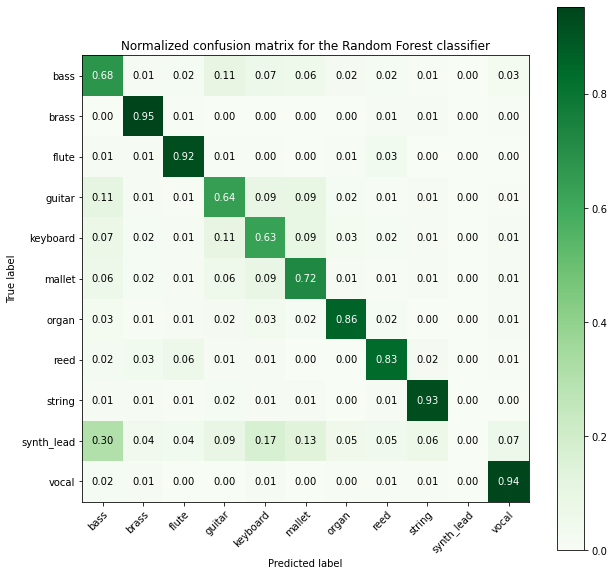

In [28]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for the Random Forest classifier')
#plt.savefig('ConfusionMatrix/RF_Normalized.png')

Utilising Grid Search ->

In [19]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [20]:
param_dist = {"n_estimators" : [20, 40, 60, 80],
              "max_depth": [10, 20, 30, 40],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [30]:
import time

# Instantiate a new random forest
clf_RF_CV = RandomForestClassifier()

# Set number of iterations
n_iter_search = 10

# Create the random search class
random_search_RF = RandomizedSearchCV(clf_RF_CV, param_distributions=param_dist,
                                      n_iter=n_iter_search, cv=5)

# Start the timer
start_time = time.time()

# Fit the model
random_search_RF.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print("Execution time:", execution_time, "seconds")

Execution time: 410.01031279563904 seconds


In [31]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest Classifier is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest Classifier is 76.64%


Let us plot the confusion matrix.

Normalized confusion matrix
[[6.81831311e-01 6.93240901e-03 7.36568458e-03 9.69093010e-02
  7.69786251e-02 6.06585789e-02 2.33968804e-02 1.66088966e-02
  9.67648758e-03 0.00000000e+00 1.96418255e-02]
 [2.68276325e-03 9.68477532e-01 4.69483568e-03 2.01207243e-03
  2.01207243e-03 0.00000000e+00 1.34138162e-03 7.37759893e-03
  9.38967136e-03 0.00000000e+00 2.01207243e-03]
 [8.52878465e-03 7.46268657e-03 9.32835821e-01 2.13219616e-03
  1.06609808e-02 2.13219616e-03 5.33049041e-03 2.55863539e-02
  5.33049041e-03 0.00000000e+00 0.00000000e+00]
 [8.25635104e-02 8.08314088e-03 2.88683603e-03 6.93129330e-01
  8.11200924e-02 9.29561201e-02 2.16512702e-02 3.75288684e-03
  1.12586605e-02 0.00000000e+00 2.59815242e-03]
 [4.97704316e-02 1.12029385e-02 9.18273646e-03 8.41138659e-02
  6.91092746e-01 8.88888889e-02 2.38751148e-02 1.87327824e-02
  8.99908173e-03 0.00000000e+00 1.41414141e-02]
 [3.99774775e-02 1.52027027e-02 5.63063063e-03 3.91328829e-02
  6.86936937e-02 7.93637387e-01 8.44594595e-03 6.1

<AxesSubplot:title={'center':'Normalized confusion matrix for Random Forest After Randomized Search'}, xlabel='Predicted label', ylabel='True label'>

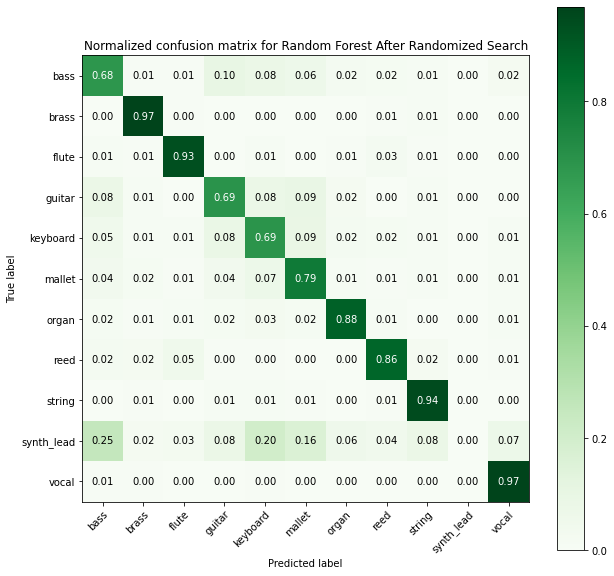

In [32]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest After Randomized Search')
#plt.savefig('ConfusionMatrix/RF_Normalized_RandomSearch.png')


In [33]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=6,
                       min_samples_split=5, n_estimators=80)

In [34]:
# saving the trained model
with open("/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/random_search_RF.pickle", mode='wb') as file:
    pickle.dump(random_search_RF, file)


## SVM

In [35]:
# instantiate the sclaer
scaler = MinMaxScaler()

In [36]:
# scale the feature space
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [37]:
# instatiate the  classifier
clf_svm = SVC(C=0.1)

In [38]:
# fitting the model
clf_svm.fit(X_train_scale, y_train)

SVC(C=0.1)

In [39]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

/Users/abhimanyuwadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 3.48%


In [41]:
# display non-normalized confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 6924],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1491],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  938],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3464],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 5445],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3552],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3708],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1429],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2017],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  566],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1065]])

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<AxesSubplot:title={'center':'Normalized confusion matrix for SVMs'}, xlabel='Predicted label', ylabel='True label'>

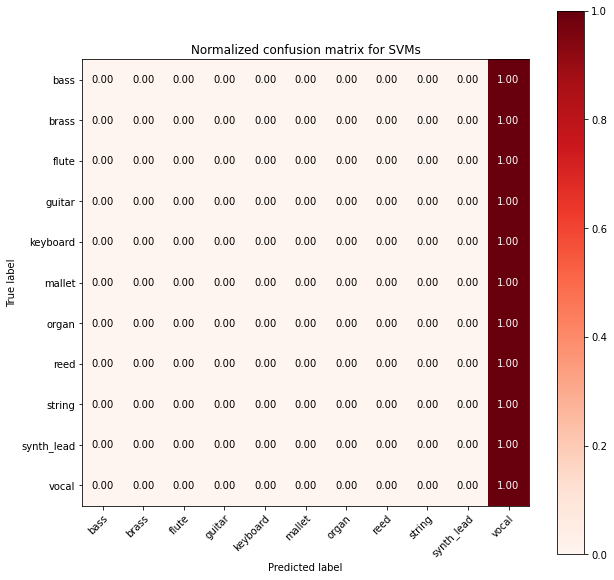

In [44]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for SVMs')
#plt.savefig('ConfusionMatrix/SVM_Normalized.png')